# ImageJ: Morphological operations

In [1]:
%load_ext autoreload
%autoreload 2

# Default imports
import sys
sys.path.append('../../../')
from helpers import *
from matplotlib import pyplot as plt
from myst_nb import glue
import numpy as np
from scipy import ndimage

## Introduction

ImageJ's {menuselection}`Process --> Binary` submenu contains various useful commands for working with binary images, including some of the morphological operations we've looked at.

However, there are other useful morphological operations lurking elsewhere -- although most require extra plugins, or switching to Fiji.


## Erosion, dilation, opening & closing

{menuselection}`Process --> Binary` contains the commands {menuselection}`Erode`, {menuselection}`Dilate`, {menuselection}`Open` and {menuselection}`Close-` commands.

These are relevant here, but my advice is to avoid them.
By default they work with fixed 3×3 pixel neighborhoods, but they *could* do something different if someone has been messing about with the {guilabel}`Iterations (1-100)` or {guilabel}`Count (1-8)` options under {menuselection}`Process --> Binary --> Options...` -- and this unpredictability could well cause trouble.

To perform erosion, dilation, opening and closing with more control and possibly larger neighborhoods, I strongly prefer to use the {menuselection}`Process --> Filters --> Maximum...` and {menuselection}`Process --> Filters --> Minimum...` commands, combining them if necessary.


:::{admonition} Morphological operations in Fiji
:class: tip

Fiji contains {menuselection}`Process --> Morphology --> Gray Morphology`, which provides a more flexible implementation of erosion, dilation, opening and closing using a variety of shapes for both grayscale and binary images.

You can also find the plugin for ImageJ at https://imagej.nih.gov/ij/plugins/gray-morphology.html
:::



## Outlines, holes & skeletonization

The {menuselection}`Process --> Binary --> Outline` command, predictably, removes all the interior pixels from
2D binary objects, leaving only the perimeters ({numref}`fig-outline_fill_skeleton`A).

{menuselection}`Process --> Binary --> Fill Holes` would then fill these interior pixels in again, or indeed fill in any background pixels that are completely surrounded by foreground pixels ({numref}`fig-outline_fill_skeleton`B).

{menuselection}`Process --> Binary --> Skeletonize` shaves off all the outer pixels of an object until only a connected central line remains ({numref}`fig-outline_fill_skeleton`C).

:::{admonition} Analyzing skeletons
:class: tip

If you are analyzing linear structures (e.g. blood vessels, neurons), then this command or those in Fiji's {menuselection}`Plugins --> Skeleton -->` submenu may be helpful.
:::

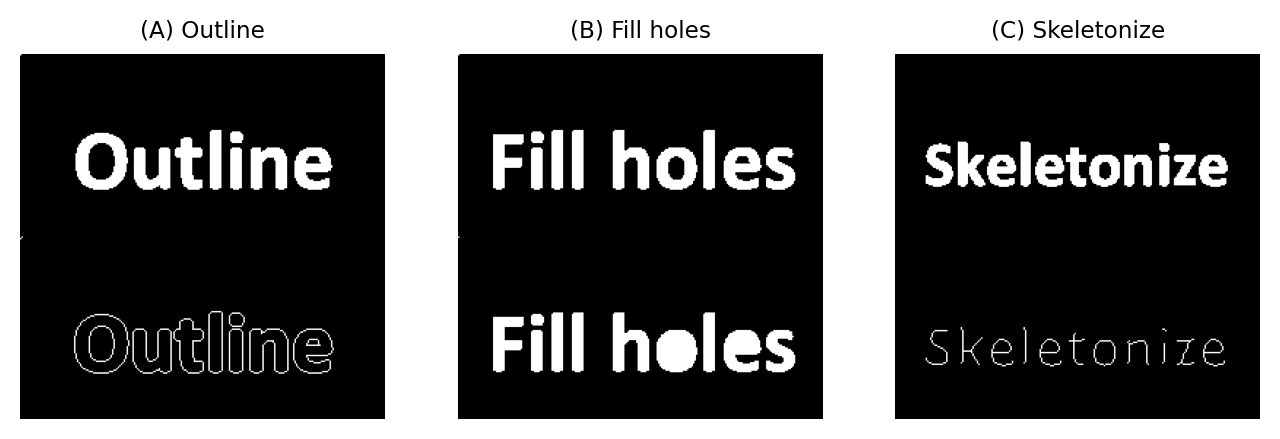

In [2]:
fig = create_figure(figsize=(8, 4))

# There are different ways to generate outlines, depending upon how thick they should be
# and whether we get the 'inner' or 'outer'.
bw_outline = load_image('images/outline.png') > 0
bw_outlined = ndimage.binary_dilation(bw_outline) ^ bw_outline

# Fill holes
bw_fill = load_image('images/fill_holes.png') > 0
bw_filled = ndimage.binary_fill_holes(bw_fill)

# ndimage doesn't include skeletonize - so use skimage instead
# (Note that different skeletonize algorithms might give different results)
from skimage.morphology import skeletonize
bw_skeletonize = load_image('images/skeletonize.png') > 0
bw_skeletonized = skeletonize(bw_skeletonize)

# Show original concatenated with the filtered images
show_image(np.vstack((bw_outline, bw_outlined)), title="(A) Outline", pos=131)
show_image(np.vstack((bw_fill, bw_filled)), title="(B) Fill holes", pos=132)
show_image(np.vstack((bw_skeletonize, bw_skeletonized)), title="(C) Skeletonize", pos=133)
glue_fig('fig_outline_fill_skeleton', fig)

```{glue:figure} fig_outline_fill_skeleton
---
align: center
name: fig-outline_fill_skeleton
---
The effects of the {menuselection}`Outline`, {menuselection}`Fill holes` and {menuselection}`Skeletonize` commands.
```

````{tab-set}

```{tab-item} Question


The outline of an object in a binary image can also be determined by applying one other morphological operation to a duplicate of the image, and then using the {menuselection}`Image Calculator`.
How?
```

```{tab-item} Answer

To outline the objects in a binary image, you can simply calculate the difference between the original image and an eroded (or dilated, if you want the pixels just beyond the objects) duplicate of the image.
```

````

## Other morphological operations

ImageJ doesn't contain an implementation of morphological reconstruction, and therefore doesn't support all the extra operations that derive from it.

However, there's an extremely library called [**MorphoLibJ**](https://imagej.net/plugins/morpholibj) that can be added to ImageJ or Fiji, which contains morphological reconstruction and much more.

Check out the excellent documentation at https://imagej.net/plugins/morpholibj for more details.